# Stations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
%run 'Color_and_Legends.ipynb'

In [3]:
ttc = pd.read_csv('ttc_delays_cleaned.csv')
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour
ttc.head(2)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description,Hour
0,1/1/2014,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron,2
1,1/1/2014,02:40,Wednesday,SHEPPARD,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN,2


Update the stations to append the line to the name 

In [4]:
ttc['Station_Line'] = ttc['Station'] + ' (' + ttc['Line'] + ')'
ttc['Station_Line'].head(5)
station_group = ttc.groupby('Station_Line')

Lets order the stations by the most delays

In [17]:
def create_station_summary(station_group, sort_by):
    # Count 
    station_delay_count = station_group.size()
    sorted_delay_count = station_delay_count.sort_values(ascending=False)
    
    # Total Delays
    station_delay_total = station_group['Min Delay'].sum()
    station_delay_total = station_delay_total.sort_values(ascending=False)
    
    # Average Delay
    station_delay_average = station_group['Min Delay'].mean()
    station_delay_average = station_delay_average.sort_values(ascending=False)

    station_summary = pd.DataFrame({'Count': station_delay_count, 'Total Delay': station_delay_total, 'Average Delay': station_delay_average})
    return station_summary.sort_values(by=sort_by, ascending=False)
    

In [19]:
def createColorsForGraph(main_series):
    bar_colors = []
    for station in main_series.index:
        line = station.split('(')[1][:-1]
        color = line_color_map[line]
        bar_colors.append(color)
    return bar_colors

In [20]:
def plot_station_charts(dataset_one, dataset_two, dataset_thee, c):

    fix, ax = plt.subplots(3,1, figsize=(15,15), sharex=True)

    dataset_one.plot.bar(ax=ax[0], title='Total Time Delayed', color=c)
    dataset_two.plot.bar(ax=ax[1], title='Total Number of Delays', color=c)
    dataset_thee.plot.bar(ax=ax[2], title='Average Delay Time', color=c)
    ax[0].legend(handles=line_patches)
    plt.show()

In [54]:
station_summary = create_station_summary(station_group, ['Total Delay', 'Count', 'Average Delay'])
station_summary.head(2)
# station_summary.plot.bar(figsize=(15,5))
# plt.show()

,Average Delay,Count,Total Delay
KENNEDY (Bloor-Danforth),1.597296,3402,5434
MCCOWAN (Scarborough RT),5.343921,913,4879


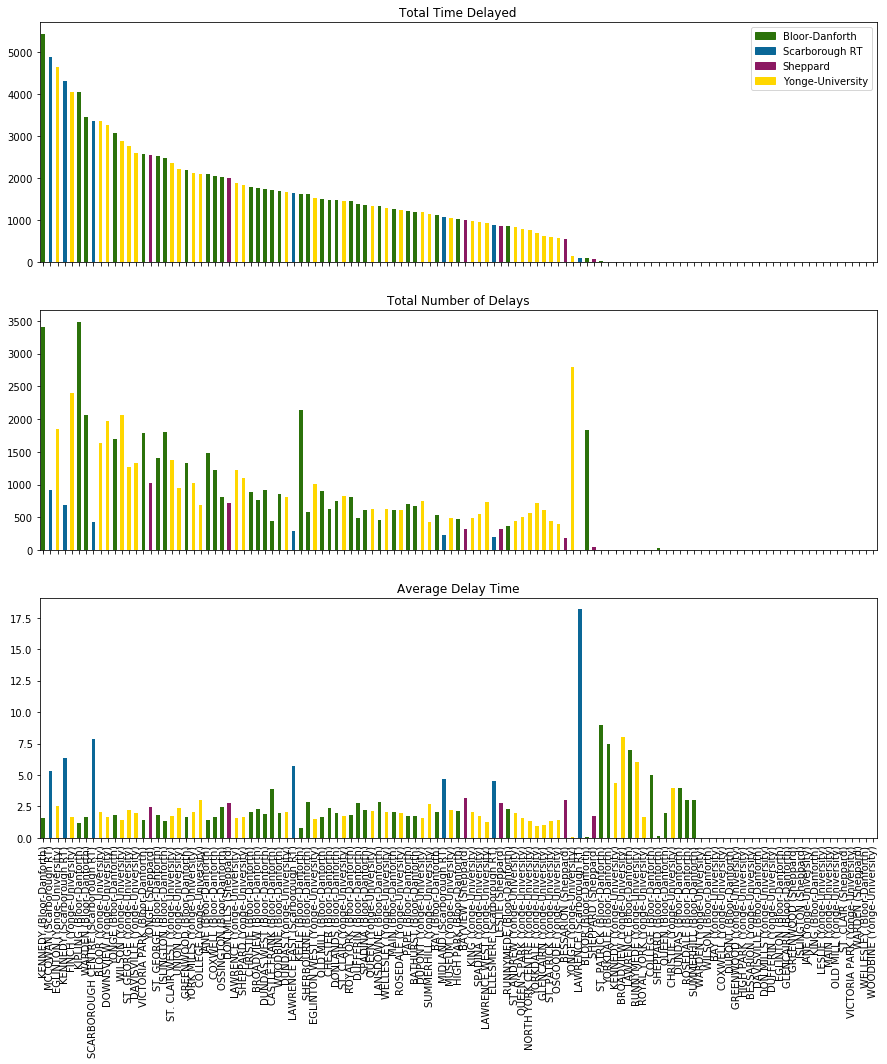

In [55]:
colors = createColorsForGraph(station_summary['Total Delay'])
plot_station_charts(station_summary['Total Delay'], station_summary['Count'], station_summary['Average Delay'], colors)

### Top Delays across all stations

Looks like a fiar number of statinos don't even register so lets look at the stations with the top number of 'Total Delays'

In [53]:
station_with_most_delays = station_summary['Total Delay'][:50].index
top_delays_stations = ttc[ttc['Station_Line'].isin(station_with_most_delays)]
top_delays_station_group  = top_delays_stations.groupby('Station_Line')
top_station_summary = create_station_summary(top_delays_station_group, ['Total Delay', 'Count', 'Average Delay'])

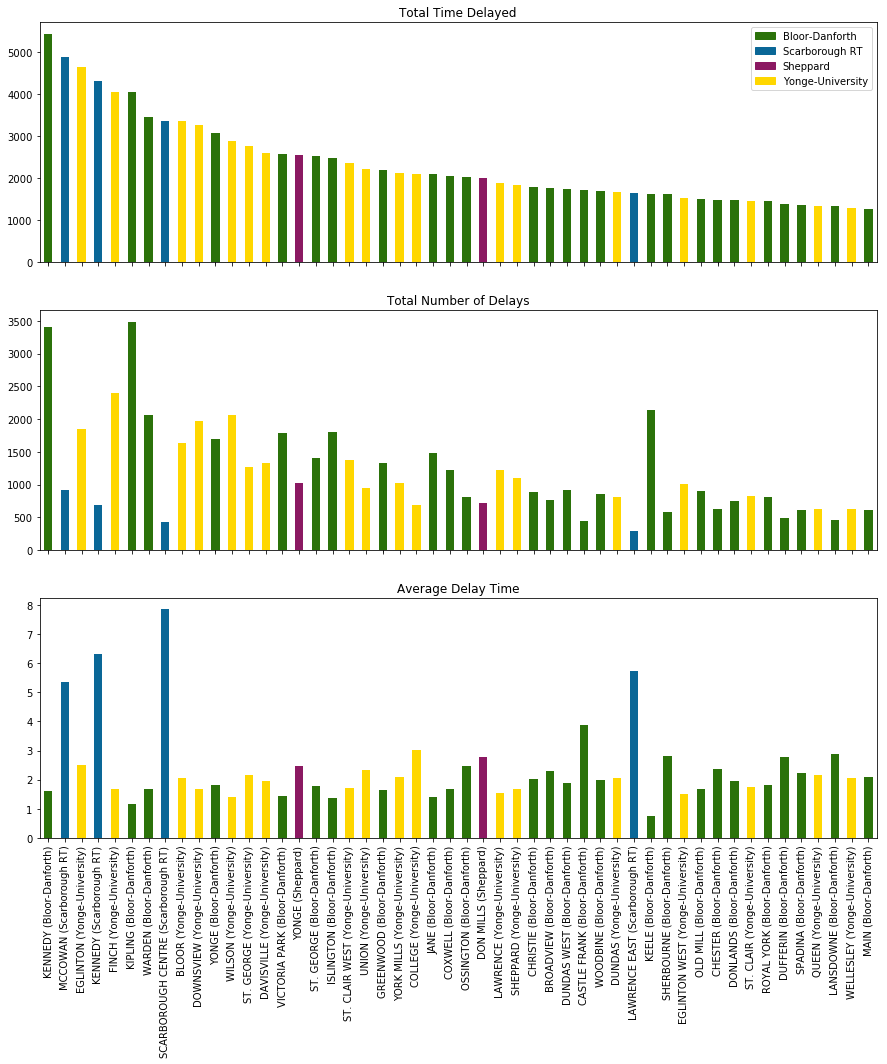

In [52]:
top_colors = createColorsForGraph(top_station_summary['Total Delay'])
plot_station_charts(top_station_summary['Total Delay'], top_station_summary['Count'], top_station_summary['Average Delay'], top_colors)

Looks like the worse stations for each line are:
Kennedy (BD)
McCowand (SRT)
Eglinton (YU)
Finch (YU)
Kipling (BD)
Warnde (BD)
Scarbought Town Center (SRT)
...
Yonge (Scar)
Don Mills (Scar)

Many of these are the end of the line stations are at the end

### Break down by individual lines

In [74]:
def plot_total_delay_for_line(line, c):
    line_stations = ttc[ttc['Line'] == line]
    line_station_group  = line_stations.groupby('Station_Line')
    line_station_summary = create_station_summary(line_station_group, ['Total Delay', 'Count', 'Average Delay'])
    line_station_summary['Total Delay'][:25].plot.bar(title='Total Time Delayed', color=c, figsize=(15,5))
    plt.show()

#### Yonge University

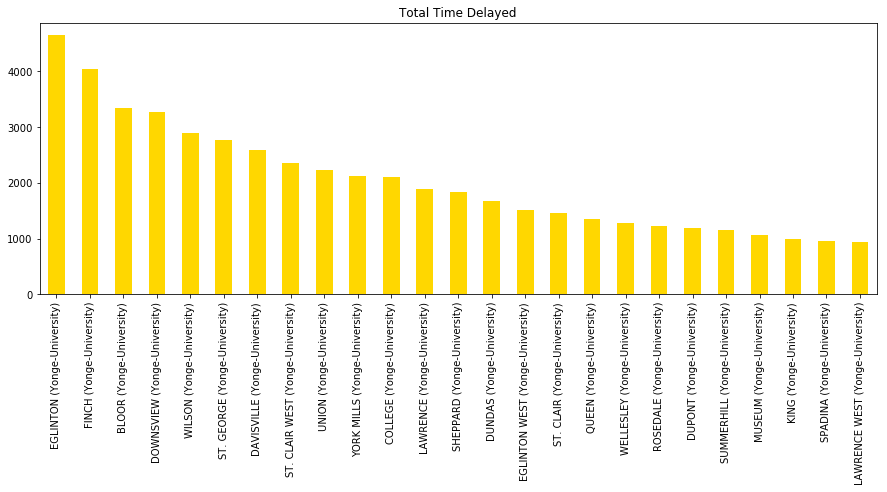

In [75]:
plot_total_delay_for_line('Yonge-University', yonge_color)

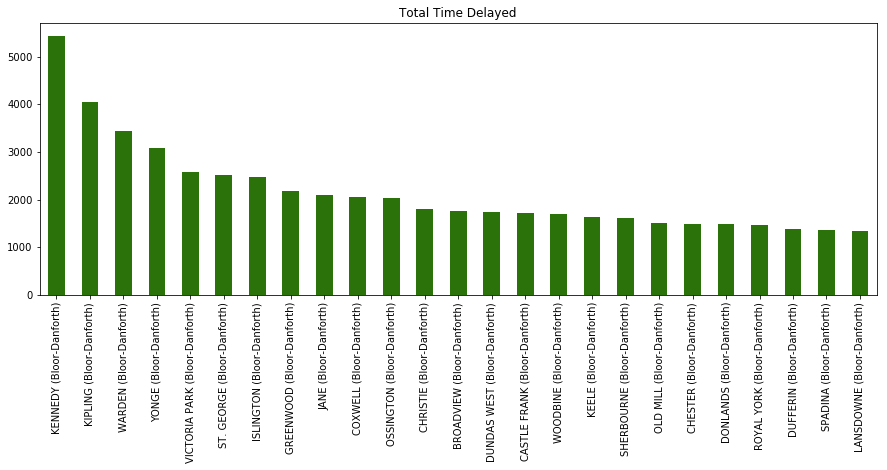

In [77]:
plot_total_delay_for_line('Bloor-Danforth', bloor_color)

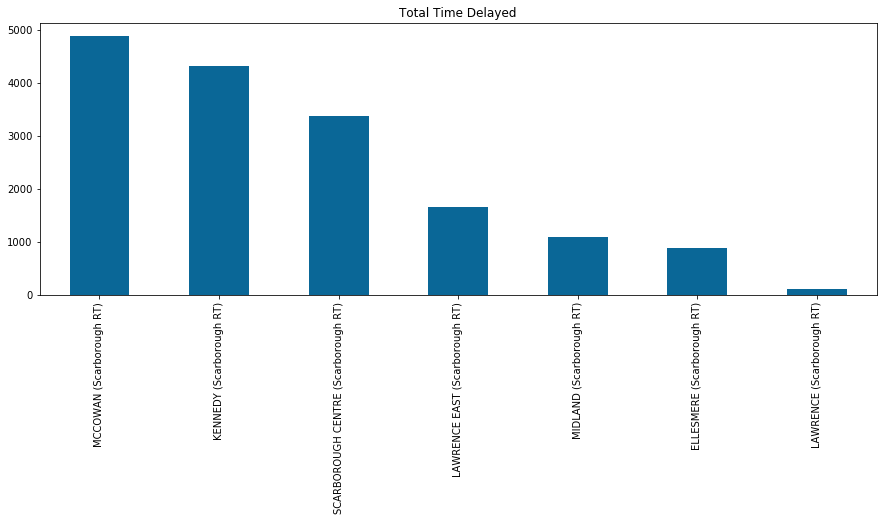

In [80]:
plot_total_delay_for_line('Scarborough RT', scarborough_color)

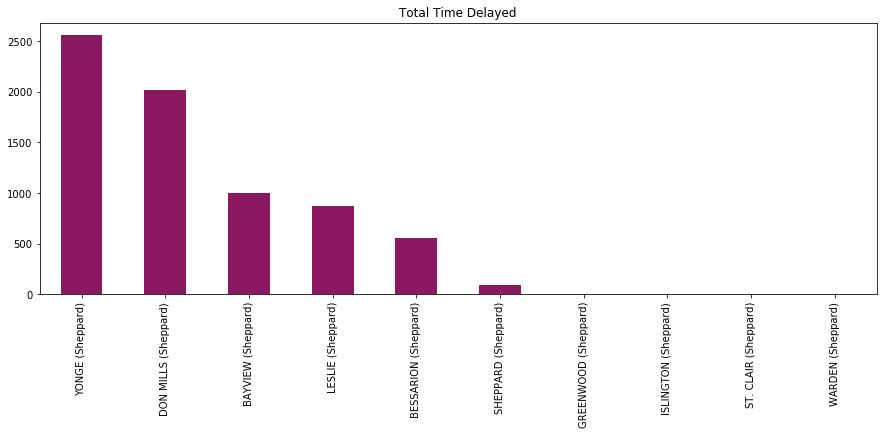

In [81]:
plot_total_delay_for_line('Sheppard', sheppard_color)

## TODO: Station place and outside

http://www.ttc.ca/About_the_TTC/Operating_Statistics/2013.jsp


https://en.wikipedia.org/wiki/List_of_Toronto_subway_stationsm

https://www.ttc.ca/PDF/Transit_Planning/Subway%20ridership%202015.pdf

## TODO: Subway based on Ridership

TODO: Stations getting better